# export canditate model

In [23]:
import sys
import tensorflow as tf
import keras 

sys.path.append("/home/webphy/Desktop/dnn_processor/")  # just to enable `dataset`
sys.path.append(
    "/home/webphy/Desktop/dnn_processor/dataset/"
)  # just to enable `dataset`
import dataset

# load dataset
train_images_rgx = "../../dataset/train_set_4x/*/*.jpeg"
valid_images_rgx = "../../dataset/test_set_4x/*/*.jpeg"
train_ds, val_ds, nclass = dataset.create_datasets(
    train_images_rgx, valid_images_rgx, 64, 80
)


In [24]:
exp_id = "exp8_no_depth_w_GAP_multiObj"
trial_id = 642
candidate_model = f"saved_models/{exp_id}/best_model_t{trial_id}/"

model = keras.models.load_model(candidate_model)
model.load_weights(candidate_model + "weights/")
model.evaluate(val_ds)

# model.summary()

3/3 [==============================] - 0s 3ms/step - loss: 1.0181 - accuracy: 0.6231


[1.0181316137313843, 0.6230769157409668]

# remove augmentation and regularization layers

In [25]:
x = x_in = keras.layers.Input(shape=(80, 80, 3))

for l in model.layers:
    if isinstance(l, keras.layers.Conv2D):
        print(l.name)
        print(l.trainable_weights[0].shape)
        x = l(x)
    if isinstance(l, keras.layers.DepthwiseConv2D):
        print(l.name)
        print(l.trainable_weights[0].shape)
        x = l(x)
    if isinstance(l, keras.layers.Activation):
        x = l(x)
    if isinstance(l, keras.layers.Flatten):
        x = l(x)
    if isinstance(l, keras.layers.Dense):
        x = l(x)
    if isinstance(l, keras.layers.GlobalAveragePooling2D):
        x = l(x)

striped_model = keras.models.Model(x_in, x)
# striped_model.summary()

conv2d_1527
(1, 1, 3, 16)
conv2d_1528
(1, 1, 16, 8)
conv2d_1529
(4, 4, 8, 35)


In [26]:
striped_model.compile(
    "adam", loss=keras.losses.categorical_crossentropy, metrics=["accuracy"]
)

striped_model.evaluate(val_ds)


3/3 [==============================] - 0s 3ms/step - loss: 1.0181 - accuracy: 0.6231


[1.0181317329406738, 0.6230769157409668]

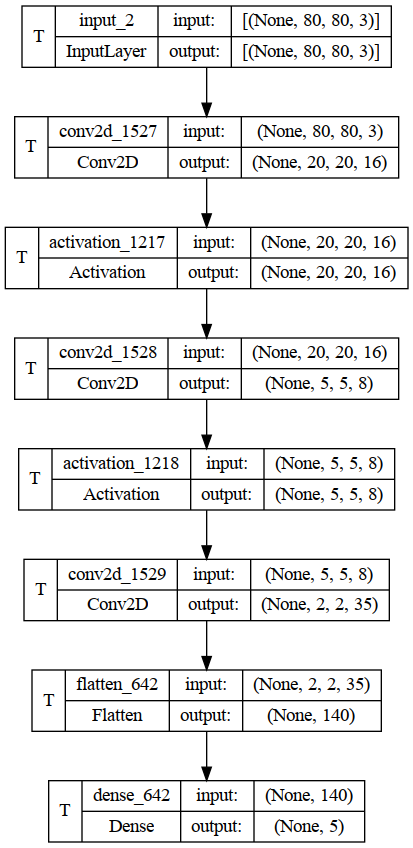

In [27]:
from keras.utils import plot_model

plot_model(
    striped_model,
    to_file="striped_model.png",
    show_shapes=True,
    show_layer_names=True,
    show_trainable=True,
)

In [28]:
striped_model.save(f"saved_models/striped_models/{exp_id}/{trial_id}.h5")

/home/webphy/Desktop/dnn_processor/.venv/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 3ms/step - loss: 1.0181 - accuracy: 0.6231


1/1 [==============================] - 0s 44ms/step
tijolo_chap %0.13612689077854156.2f


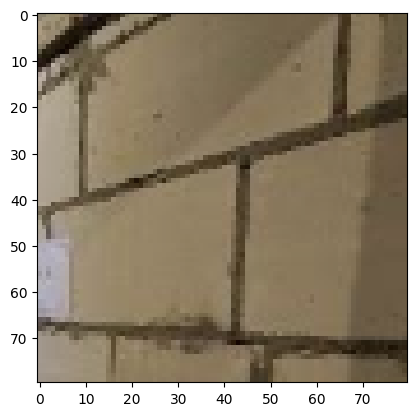

1/1 [==============================] - 0s 12ms/step
tijolo_chap %0.09982463717460632.2f


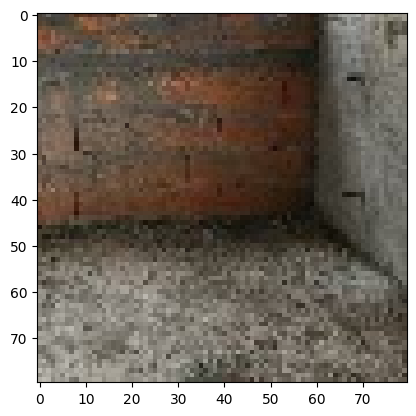

1/1 [==============================] - 0s 12ms/step
acf_chap %0.2567436397075653.2f


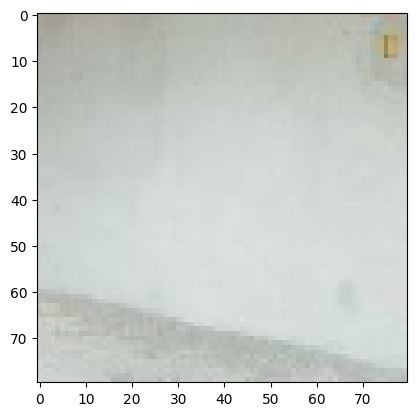

1/1 [==============================] - 0s 12ms/step
reboco %0.14175212383270264.2f


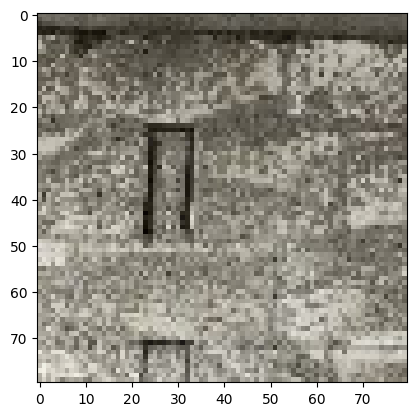

1/1 [==============================] - 0s 11ms/step
tijolo_chap %0.12963628768920898.2f


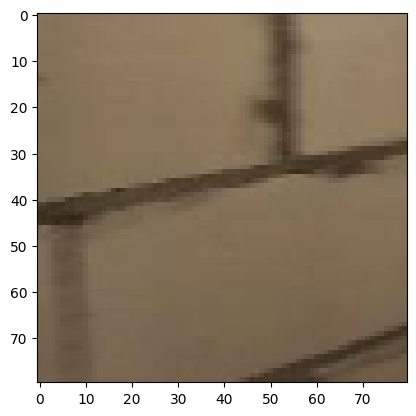

1/1 [==============================] - 0s 11ms/step
reboco %0.14435851573944092.2f


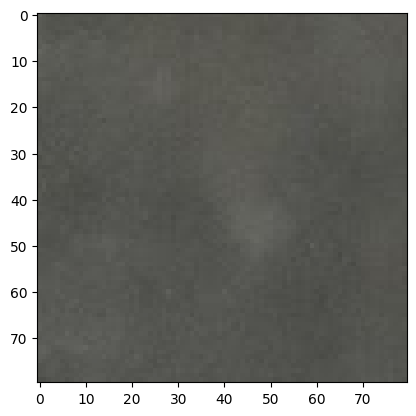

1/1 [==============================] - 0s 12ms/step
tijolo_chap %0.20387379825115204.2f


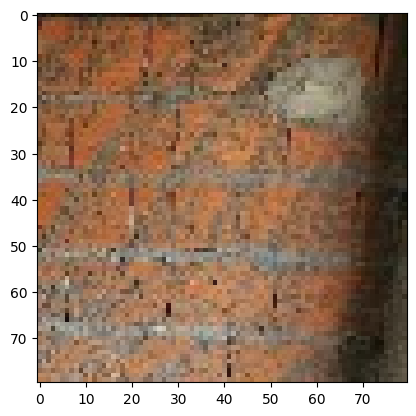

1/1 [==============================] - 0s 12ms/step
reboco %0.1272396743297577.2f


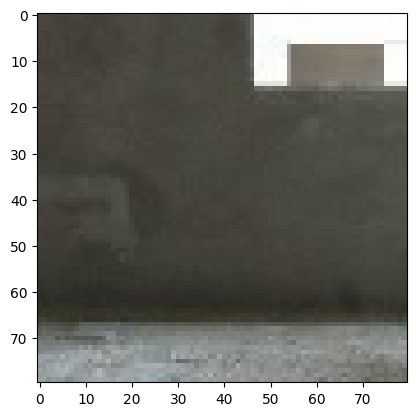

1/1 [==============================] - 0s 12ms/step
acf_chap %0.2586948871612549.2f


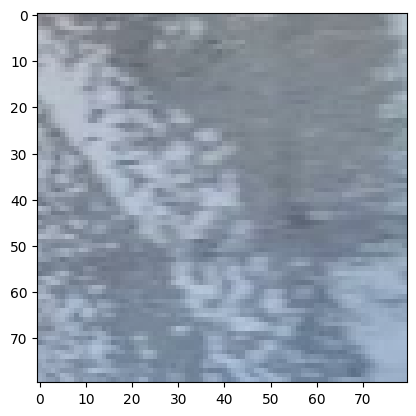

1/1 [==============================] - 0s 11ms/step
acf_chap %0.24707607924938202.2f


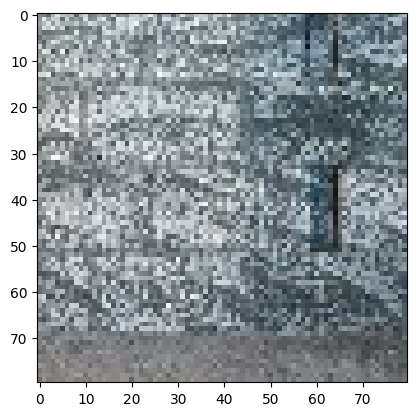

1/1 [==============================] - 0s 12ms/step
reboco %0.15643778443336487.2f


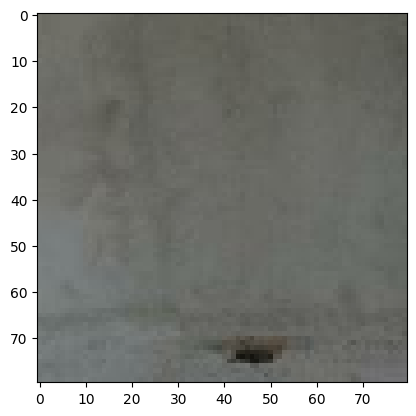

1/1 [==============================] - 0s 17ms/step
reboco %0.1244502067565918.2f


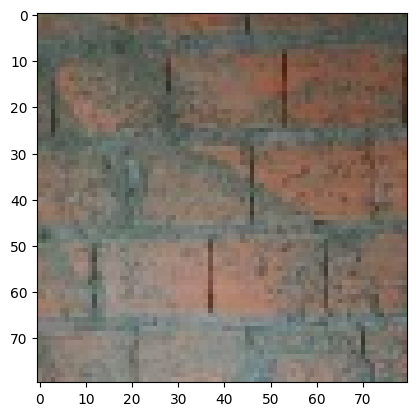

1/1 [==============================] - 0s 12ms/step
reboco %0.1640617400407791.2f


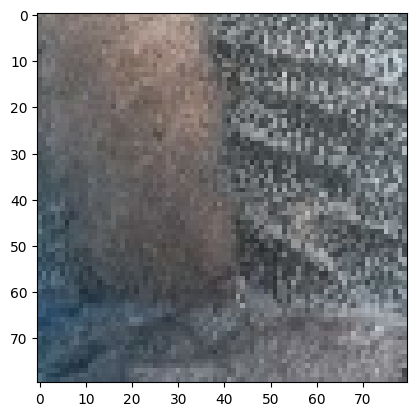

1/1 [==============================] - 0s 12ms/step
reboco %0.19437021017074585.2f


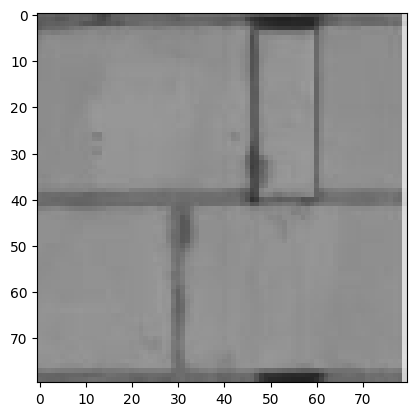

1/1 [==============================] - 0s 12ms/step
tijolo_alv %0.314924418926239.2f


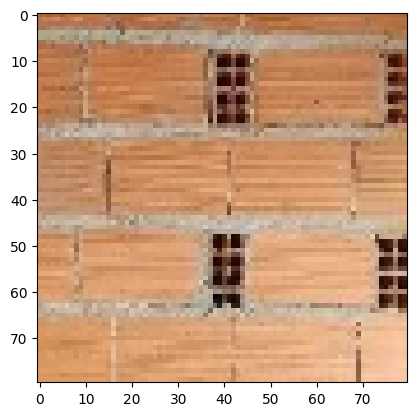

1/1 [==============================] - 0s 12ms/step
acf_alv %0.20858246088027954.2f


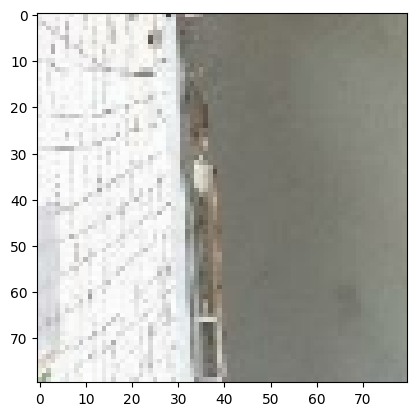

1/1 [==============================] - 0s 12ms/step
tijolo_alv %0.3909222483634949.2f


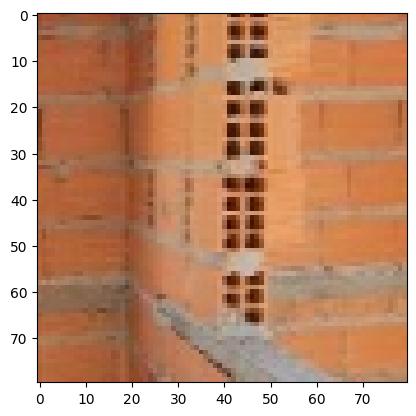

1/1 [==============================] - 0s 12ms/step
acf_chap %0.146767720580101.2f


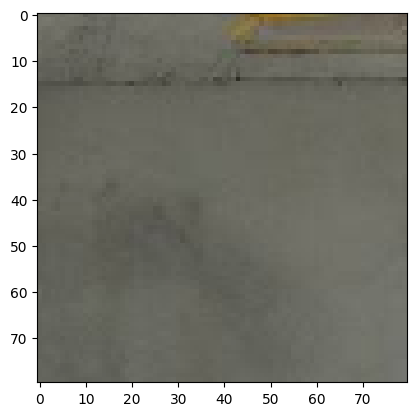

1/1 [==============================] - 0s 12ms/step
acf_chap %0.18288126587867737.2f


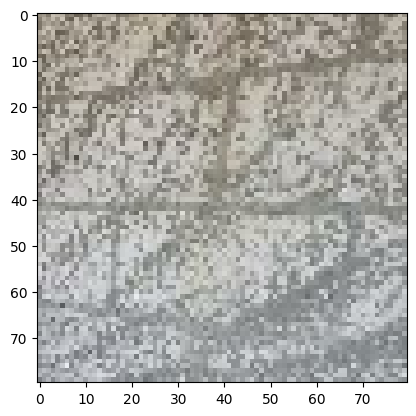

1/1 [==============================] - 0s 15ms/step
tijolo_alv %0.35671383142471313.2f


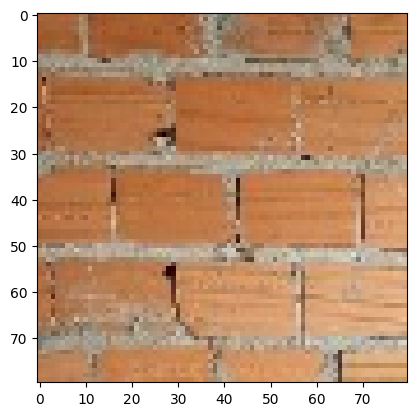

1/1 [==============================] - 0s 11ms/step
tijolo_chap %0.16306450963020325.2f


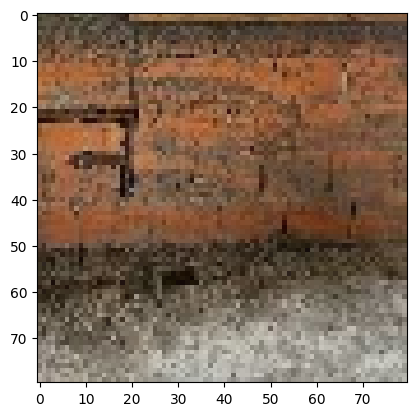

KeyboardInterrupt: 

In [29]:
import matplotlib.pyplot as plt
import numpy as np

CLASS_MAP = {
    0: "acf_alv",
    1: "acf_chap",
    2: "reboco",
    3: "tijolo_alv",
    4: "tijolo_chap",
}

model.evaluate(train_ds)
model.evaluate(val_ds)

for batch in train_ds.as_numpy_iterator():
    images = batch[0]
    labels = batch[1]
    for image, label in zip(images, labels):        
        p = model.predict(image[tf.newaxis, ...]).squeeze()
        class_id = np.argmax(p)
        print(CLASS_MAP[class_id], f"%{p[class_id]}.2f")
        
        plt.figure()
        plt.imshow(image)
        plt.show()
        
    break
        